<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Python for Data Analytics</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Final Project:</b> Diabetes Dataset Analysis </font>
   </font> 
    <br><font size="+1">
    <font color=#FFBF00><b>Submission:</b> Neha Jain, Nid Phetchamarat,Katherine Morales Lugo,Caroline Mangira </font>
   </font> 
    </center>
</h1>
</body>
</html>

<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b> Diabetes Dataset</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00> Healthcare data analysis </font>
   </font> 
    <br><font size="+1">
    <font color=#FFBF00> Neha Jain, Nid Phetchamarat,Katherine Morales Lugo,Caroline Mangira</font>
   </font> 
    </center>
</h1>
</body>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Ingestion</b></font>
    </font>  <br>
</h2>
</html>

In [ ]:
# Dataset Introduction:

In [ ]:
# Hypthesis: 

In [1]:
## Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Downloading the data from the Kaggle
raw_df = pd.read_csv("HealthCareDiabetes.csv")
raw_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Cleaning</b></font>
    </font>  <br>
</h2>
</html>

In [4]:
## Check for Missing Values
raw_df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
## Check for Duplicates
raw_df.duplicated().sum() 

np.int64(0)

In [6]:
## Percentage of missing values in each variable - based on result, we possibly remove SkinThickness and Insulin from our analysis
zero_counts = round((raw_df == 0).sum() / len(raw_df) * 100,2)
print(zero_counts)

Pregnancies                 14.45
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                     65.10
dtype: float64


In [8]:
## diabetes rows with NO zero in "Glucose", "BloodPressure", "BMI", and remove SkinThickness and Insulin
diabetes_df = raw_df.loc[( (raw_df['Glucose'] > 0) & (raw_df['BloodPressure'] > 0)  & (raw_df['BMI'] > 0) ), ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'] ]
diabetes_df.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1


<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Exploratory Data Analysis </b></font>
    </font>  <br>
</h2>
</html>

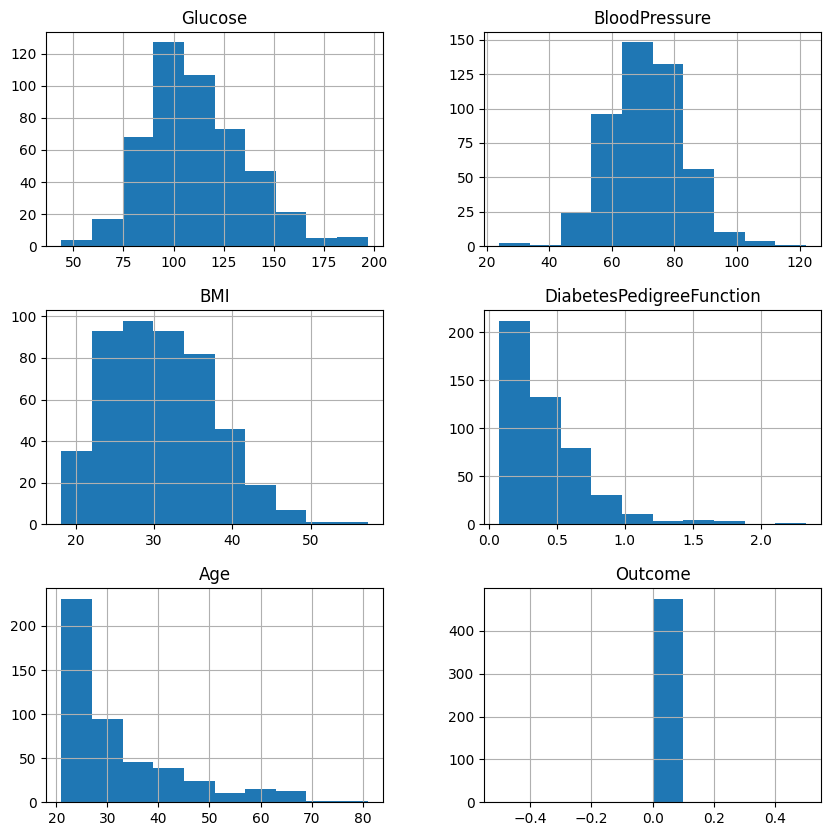

In [9]:
## Outcome == 0
diabetes_df[ (diabetes_df['Outcome'] == 0) ].hist(figsize=(10,10))
plt.show()

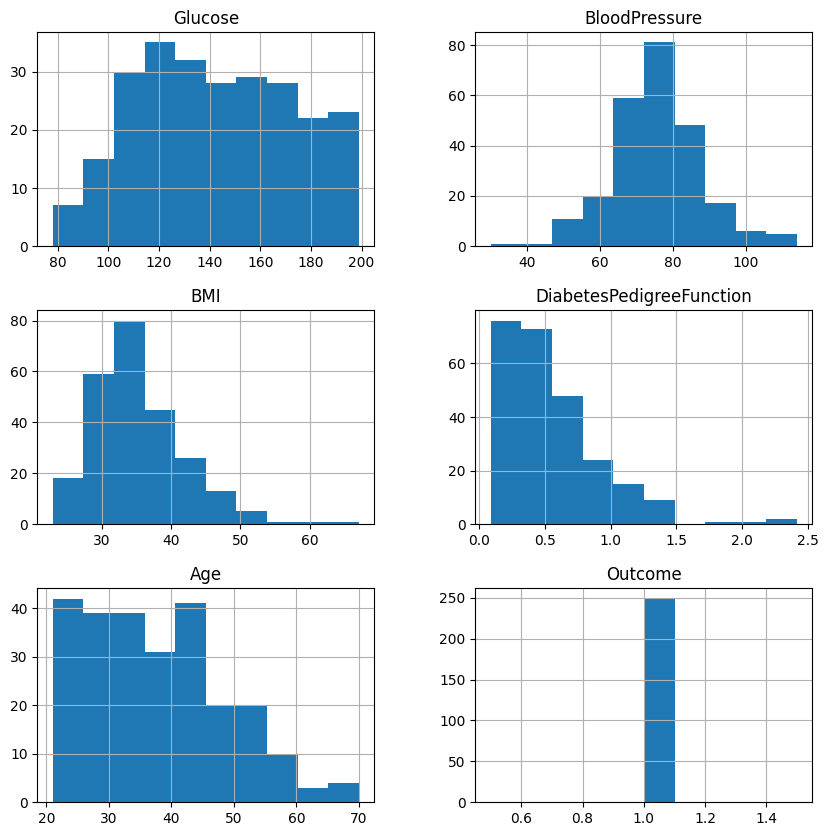

In [10]:
## Outcome == 1
diabetes_df[ (diabetes_df['Outcome'] == 1) ].hist(figsize=(10,10))
plt.show()

In [13]:
grouped_data = diabetes_df.groupby('Outcome')[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']].mean().reset_index()  
grouped_data

,Outcome,Glucose,BloodPressure,DiabetesPedigreeFunction,Age
0,0,111.016842,70.907368,0.430297,31.258947
1,1,142.610442,75.248996,0.559594,37.341365


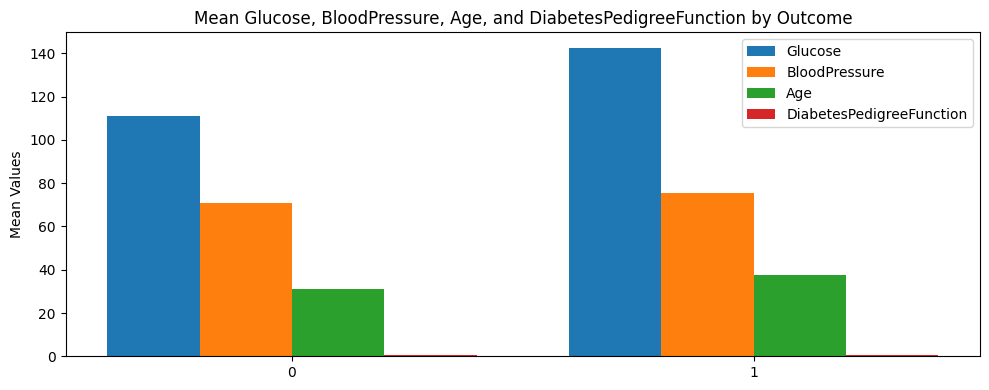

In [23]:
grouped_data = diabetes_df.groupby('Outcome')[['Glucose','BloodPressure','DiabetesPedigreeFunction','Age']].mean().reset_index() 

x = np.arange(len(grouped_data['Outcome']))  # Positions for the groups
width = 0.2
fig, ax = plt.subplots(figsize=(10, 4))  

rects1 = ax.bar(x - width * 1.5, grouped_data['Glucose'], width, label='Glucose')  ## Bars for 'Glucose' #x - width/2
rects2 = ax.bar(x - width * 0.5, grouped_data['BloodPressure'], width, label='BloodPressure') ## Bars for 'BloodPressure'
rects3 = ax.bar(x + width * 0.5, grouped_data['Age'], width, label='Age') ### Bars for 'Age'
rects4 = ax.bar(x + width * 1.5, grouped_data['DiabetesPedigreeFunction'], width, label='DiabetesPedigreeFunction') ## Bars for 'DiabetesPedigreeFunction'
ax.set_ylabel('Mean Values')
ax.set_title('Mean Glucose, BloodPressure, Age, and DiabetesPedigreeFunction by Outcome')
ax.set_xticks(x)
ax.legend()
plt.tight_layout() 
plt.show()

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Modeling </b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Visualization </b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Results & Recommendations </b></font>
    </font>  <br>
</h2>
</html>